# Pandas - spojování tabulek a vztahy mezi proměnnými

Tato lekce se nese ve znamení mnohosti a propojování - naučíš se:

- pracovat s více tabulkami najednou
- nacházet spojitosti mezi dvěma (a více) proměnnými

In [87]:
import pandas as pd

## Spojování tabulek

V lekci, kde jsme zpracovávali data o počasí, jsme ti ukázali, že je pomocí funkce `concat` možné slepit dohromady několik objektů `DataFrame` či `Series`, pokud mají "kompatibilní" index. Nyní se na problematiku podíváme trochu blíže a ukážeme si, jak spojovat tabulky na základě různých sloupců, a co dělat, když řádky z tabulky jedné nepasují přesně na tabulku druhou.

Obecně pro spojování `pandas` nabízí čtyři funkce / metody:

- Funkce `concat`
- Metoda `append`
- Funkce `merge`
- Metoda `join`

Detailní rozbor toho, co která umí, najdeš v [dokumentaci](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

### Příprava dat

Data pro dnešní hodinu (ze světa filmu) jsou veliká. Úmyslně veliká. Jsou tak veliká, že ti je nemůžeme naservírovat na stříbrném podnose (leda bys sebou takový podnos měl/a a na něm ležela flashka, na kterou ti je můžeme nahrát). Nabízí se dvě možnosti, jak je můžeš získat:

**Alternativa 1.** Stáhni si manuálně do aktuálního adresáře následující soubory:

- https://datasets.imdbws.com/title.basics.tsv.gz
- https://datasets.imdbws.com/title.ratings.tsv.gz
- https://github.com/coobas/pycon-cz-2019-workshop/raw/master/data/rotten_tomatoes_top_movies_2019-01-15.csv
- https://github.com/coobas/pycon-cz-2019-workshop/raw/master/data/boxoffice_march_2019.csv.gz

**Alternativa 2:** Pusť si (ideálně ještě doma, před hodinou) následující kód, který stáhne všechny potřebné soubory. Navíc to učiní pouze jednou, opětovné volání už nic dalšího nestahuje.

<div style="color: red; background: yellow">Vyřešit, odkud budeme data brát, jsou to stovky MB a navíc není jasné, jak moc legální je mít je lokálně uložená.</div>

In [114]:
# Nutné importy ze standardní knihovny
import os
from urllib.request import urlopen

# Seznam souborů (viz níže)
zdroje = [
    "https://datasets.imdbws.com/title.basics.tsv.gz",
    "https://datasets.imdbws.com/title.ratings.tsv.gz",
    "https://github.com/coobas/pycon-cz-2019-workshop/raw/master/data/rotten_tomatoes_top_movies_2019-01-15.csv",
    "https://github.com/coobas/pycon-cz-2019-workshop/raw/master/data/boxoffice_march_2019.csv.gz"
]

for url in zdroje:
    # Pouze poslední část cesty adresy datového zdroje je jeho jméno
    jmeno = url.rsplit("/")[-1]
    
    if not os.path.exists(jmeno):        
        print(f"Soubor {jmeno} ještě není stažen, jdeme na to...")
        
        # Sendvičově otevřeme výstup (soubor na disku) i vstup (webovou stránku)
        with open(jmeno, "wb") as outfile:  # Pozor - binární mód
            with urlopen(url) as inpage:
                # A jen přepíšeme obsah 
                outfile.write(inpage.read())
        print(f"Soubor {jmeno} úspěšně stažen.")
    else:
        print(f"Soubor {jmeno} už byl stažen, použijeme místní kopii.")

Soubor title.basics.tsv.gz už byl stažen, použijeme místní kopii.
Soubor title.ratings.tsv.gz už byl stažen, použijeme místní kopii.
Soubor rotten_tomatoes_top_movies_2019-01-15.csv už byl stažen, použijeme místní kopii.
Soubor boxoffice_march_2019.csv.gz už byl stažen, použijeme místní kopii.


In [ ]:
Máme staženo několik souborů

In [82]:
imdb_titles = pd.read_csv('title.basics.tsv.gz', sep='\t', na_values="\\N")
imdb_ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', na_values="\\N")
# boxoffice = pd.read_csv('../data/boxoffice_march_2019.csv.gz')
rotten_tomatoes = pd.read_csv("rotten_tomatoes_top_movies_2019-01-15.csv")
# awards = pd.read_sql("awards", con='sqlite:///../data/awards.sqlite')

In [115]:
imdb_titles["title_type"] = imdb_titles["titleType"].astype("category")
imdb_titles.loc[imdb_titles.isAdult > 1, 'isAdult'] = 0
imdb_titles = imdb_titles.dropna(subset=["startYear"])
imdb_titles["runtimeMinutes"] = pd.to_numeric(imdb_titles.runtimeMinutes, errors="coerce").astype("Int64")

movie_titles = imdb_titles[imdb_titles.titleType.isin(["movie", "tvMovie"])]
movie_titles = movie_titles.drop(columns=["titleType", "endYear"]).dropna()

In [86]:
### Řazení pod sebe

In [99]:
a = pd.Series([1, 2, 3])
b = pd.Series([4, 5, 6])

In [100]:
a.append(b)

0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

In [118]:
pd.concat([a, b])

0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

In [119]:
pd.concat([a, b], axis=1)

,0,1
0,1,4
1,2,5
2,3,6


In [107]:
movies_rated = movie_titles.merge(imdb_ratings, on='tconst', how='inner')

In [109]:
rotten_tomatoes["year"] = rotten_tomatoes["Title"].str.slice(___, ___)
rotten_tomatoes["Title"] = rotten_tomatoes["Title"].str.slice_replace(___, ___, ___)

AttributeError: Can only use .str accessor with string values!

EDA 4: Práce s více proměnnými, více zdroji
-	Joins, merge
-	Korelace
-	Scatterplot (again), catplot, heatmap
-	seaborn.pairplot
-	Pandas_profiling?
-	Data: IMDB


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Vztahy mezi dvěma proměnnými

Když jsme studovali vlastnosti zemí světa, věnovali jsme se především jednotlivým charakteristikám zvlášť, nanejvýš pak jsme si udělali intuitivní obrázek z bodového grafu ("scatter plot"), kde osy *x* a *y* patřily dvěma různým vlastnostem. Nyní se vztahy mezi více proměnnými budeme zabývat rigorózně a ukážeme si i některé odvážnější vizualizace.

In [47]:
import plotly as pt
iris = pt.data.iris()
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


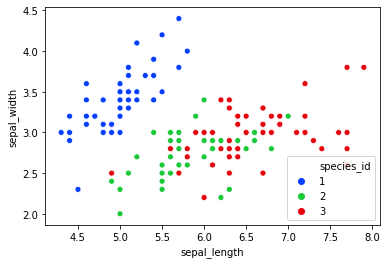

In [67]:
sns.scatterplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    palette=sns.palettes.color_palette("bright6", 3),
    hue="species_id"
)

### Korelace

In [50]:
iris["sepal_width"].corr(iris["sepal_length"])

-0.10936924995064937

In [52]:
iris.drop("species_id", axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [53]:
iris.groupby("species_id").corr()

sepal_length  sepal_width  petal_length  petal_width
species_id                                                                   
1          sepal_length      1.000000     0.746780      0.263874     0.279092
           sepal_width       0.746780     1.000000      0.176695     0.279973
           petal_length      0.263874     0.176695      1.000000     0.306308
           petal_width       0.279092     0.279973      0.306308     1.000000
2          sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
3          sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000     0.322108
           petal_width       0.281108     0.537728      0.322108     1.000000

In [68]:
Anscombe Quartet

DataSaurus

SyntaxError: invalid syntax (<ipython-input-68-6e94a53ab4fc>, line 1)

### Korelace versus kauzalita



### Heatmap

## Vztahy mezi více proměnnými

Pokud si tyto materiály nečteš na holografickém displeji, jsi při zobrazování dat omezen/a na dva rozměry. Můžeš si prohlížet dvourozměrné tabulky, kreslit dvourozměrné grafy.

In [6]:
# scattermatrix

In [7]:
# pairplot

In [8]:
# 3D grafy

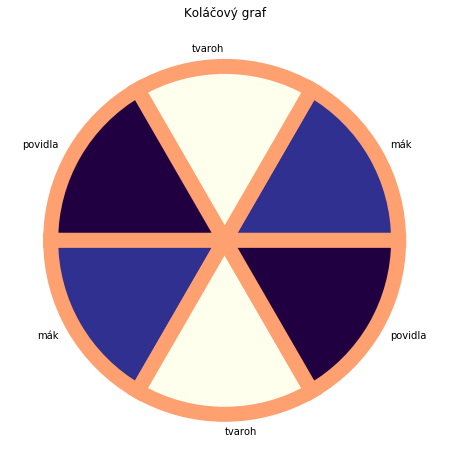

In [41]:
import pandas as pd
kolac = pd.Series(
    [1, 1, 1] * 2,
    index = ["mák", "tvaroh", "povidla"] * 2
)
ax = kolac.plot.pie(
    figsize=(8, 8),
    title="Koláčový graf",
    colors=["#303090", "#ffffed", "#200040"] * 2,
    wedgeprops = {'linewidth': 15, 'edgecolor': "#ffa070"},
)
ax.set_ylabel(None);